In [52]:
# Installing Dependencies
!pip install -U scikit-learn
!pip install -U pandas

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
# importing scikit learn models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
# Importing csv datasets and converting to pandas dataframes

generation_data_1 = pd.read_csv("./solar_dataset/Plant_1_Generation_Data.csv")
sensor_data_1 = pd.read_csv("./solar_dataset/Plant_1_Weather_Sensor_Data.csv")

In [56]:
# Converting the date time format to match
generation_data_1['DATE_TIME'] = pd.to_datetime(generation_data_1['DATE_TIME'],format = '%d-%m-%Y %H:%M')
generation_data_1['DATE_TIME'] = generation_data_1['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [57]:
# Merging two pandas data frames
merged_data = generation_data_1.merge(sensor_data_1, on = 'DATE_TIME')

merged_data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [58]:
# Filtering data that have irradiation
condition = (merged_data['IRRADIATION'] > 0.0)
filtered_data = merged_data[condition]

In [59]:
# Setting specific viewing columns
selected_columns = ['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

filtered_data[selected_columns][100:150]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
589,2020-05-15 06:45:00,1293.571429,126.085714,38.142857,7111531.143,24.218990,24.442444,0.095394
590,2020-05-15 06:45:00,1296.714286,126.371429,37.428571,7016869.429,24.218990,24.442444,0.095394
591,2020-05-15 06:45:00,1289.285714,125.685714,37.714286,7038718.714,24.218990,24.442444,0.095394
592,2020-05-15 06:45:00,1317.714286,128.514286,37.714286,6782635.714,24.218990,24.442444,0.095394
593,2020-05-15 06:45:00,1332.857143,130.014286,38.000000,7007904.000,24.218990,24.442444,0.095394
594,2020-05-15 06:45:00,1264.714286,123.157143,36.571429,6339416.571,24.218990,24.442444,0.095394
595,2020-05-15 06:45:00,1166.857143,113.457143,33.857143,7116184.857,24.218990,24.442444,0.095394
596,2020-05-15 07:00:00,1734.571429,170.014286,72.714286,6259631.714,24.537398,27.185653,0.141940
597,2020-05-15 07:00:00,1990.375000,195.100000,82.375000,6183727.375,24.537398,27.185653,0.141940
598,2020-05-15 07:00:00,1963.375000,192.450000,79.500000,6987838.500,24.537398,27.185653,0.141940


In [60]:
# X contains features, y contains the target variable
X = filtered_data['IRRADIATION'].values.reshape(-1,1)

y = filtered_data['AC_POWER'].values

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [62]:
X_train
y_train

array([1095.2625   ,  461.2875   ,  616.4857143, ...,  182.4125   ,
        757.55     , 1088.014286 ])

In [63]:
# Instantiate and terain a scikit-learn model (Linear Regresssion in the example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Make the predictions on the test set
y_pred = model.predict(X_test)

In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6378.7060777813385


In [66]:
y_pred = model.predict(X_test)

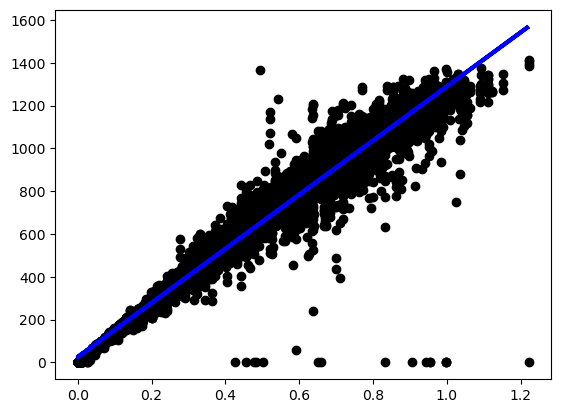

In [67]:
plt.scatter(X_test, y_test, color= "black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)